In [2]:
import pandas as pd
data = pd.read_excel('PM10_Process.xlsx')
day = []
for i in range(362):
    day.append(i)
data['Day'] = day
data.head()

,Unnamed: 0,PM10,Tempreture,Humid,Wind Speed,Wind Direction Sin,Wind Direction COS,Pressure,RainFall,Day
0,0,133.916667,19.0,47.125,1.87500,-0.9397,-0.342020,1011.76,0.00,0
1,1,147.833333,20.7,45.000,2.62500,0.7660,-0.642788,1012.04,0.10,1
2,2,157.958333,19.9,54.375,5.42857,0.4999,-0.866025,1007.88,0.61,2
3,3,48.708333,16.6,91.250,2.87500,0.9397,-0.342020,1008.66,22.00,3
4,4,47.541667,18.9,70.125,1.87500,-0.5000,0.866025,1007.70,1.00,4


In [68]:
X = data[['Humid','Wind Speed','Wind Direction Sin','Wind Direction COS','Pressure','RainFall','Day']]
X = X.values
Y = data['PM10']
Y = Y.values
from sklearn.preprocessing import StandardScaler
sc_X3 = StandardScaler()
sc_y3 = StandardScaler()
X3_3 = sc_X3.fit_transform(X)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, random_state=0 ,test_size=0.2)


# MLP

In [138]:
import keras
from keras.layers import Dense
from keras.models import Sequential
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=7))
model.add(Dense(12,activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=200,batch_size=len(x_train), verbose=0)
model.evaluate(x_test,y_test)


3/3 [==============================] - 0s 9ms/step - loss: 8568.0977


8568.09765625

In [139]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
y_new_inverse3 = model.predict(x_test)
mse33 = mean_squared_error(y_test, y_new_inverse3)
mae33 = mean_absolute_error(y_test, y_new_inverse3)
rmse33 = math.sqrt(mse33)
print('mse : %.3f'%mse33)
print('rmse : %.3f'%rmse33)
print('mae : %.3f'%mae33)

mse : 8568.097
rmse : 92.564
mae : 54.165


(10, 180)

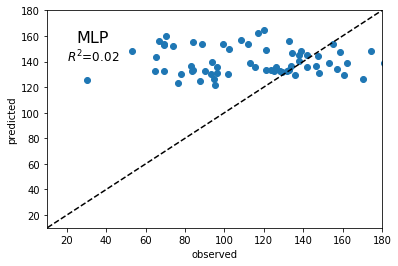

In [148]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, r2_score
plt.scatter(y_test,y_new_inverse3)
plt.plot([0, 250], [0, 250], '--k')
plt.ylabel('predicted')
plt.xlabel('observed')
plt.text(25,155,'MLP',fontsize=16)
plt.text(20,140, r'$R^2$=%.2f'% (
       r2_score(y_test,y_new_inverse3)),fontsize=12)
plt.xlim([10, 180])
plt.ylim([10, 180])

In [141]:
model_json1 = model.to_json()
with open("MLP_PM10_with_without_Autocorelation_1.json", "w") as json_file:
    json_file.write(model_json1)
# serialize weights to HDF5
model.save_weights("MLP_PM10_without_Autocorelation_1.h5")
print("Saved model to disk")

Saved model to disk


# Random Forest

In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
regressor10 = RandomForestRegressor(n_estimators=668, random_state=0)
regressor10.fit(x_train, y_train)
y_new_inverse30 = regressor10.predict(x_test)
mse33 = mean_squared_error(y_test, y_new_inverse30)
mae33 = mean_absolute_error(y_test, y_new_inverse30)
rmse33 = math.sqrt(mse33)
print('mse : %.3f'%mse33)
print('rmse : %.3f'%rmse33)
print('mae : %.3f'%mae33)

mse : 7419.055
rmse : 86.134
mae : 52.977


(10, 180)

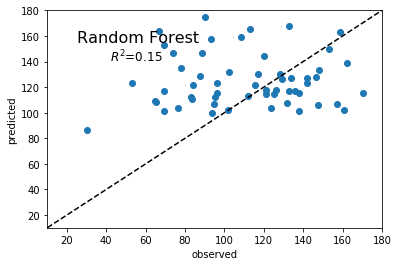

In [143]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, r2_score
plt.scatter(y_test,y_new_inverse30)
plt.plot([0, 250], [0, 250], '--k')
plt.ylabel('predicted')
plt.xlabel('observed')
plt.text(25,155,'Random Forest',fontsize=16)
plt.text(42,140, r'$R^2$=%.2f'% (
       r2_score(y_test,y_new_inverse30)),fontsize=12)
plt.xlim([10, 180])
plt.ylim([10, 180])

# Linear Regression

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
sklinreg = LinearRegression()
sklinreg.fit(x_train, y_train)
y_ord_pred = sklinreg.predict(x_test)
mse33 = mean_squared_error(y_test, y_ord_pred)
mae33 = mean_absolute_error(y_test, y_ord_pred)
rmse33 = math.sqrt(mse33)
print('mse : %.3f'%mse33)
print('rmse : %.3f'%rmse33)
print('mae : %.3f'%mae33)

mse : 9681.171
rmse : 98.393
mae : 61.038


(10, 180)

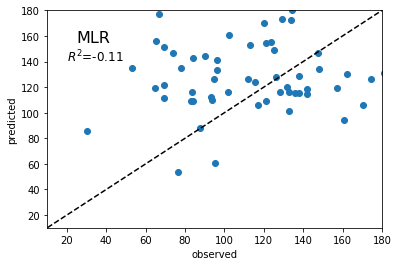

In [146]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, r2_score
plt.scatter(y_test,y_ord_pred)
plt.plot([0, 250], [0, 250], '--k')
plt.ylabel('predicted')
plt.xlabel('observed')
plt.text(25,155,'MLR',fontsize=16)
plt.text(20,140, r'$R^2$=%.2f'% (
       r2_score(y_test,y_ord_pred)),fontsize=12)
plt.xlim([10, 180])
plt.ylim([10, 180])